In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
claimants = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Datasets\Module 9 - Logistic Regression\claimants.csv")
claimants.head(5)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


#### This data set output variable or dependent variable is discrete and binary in nature hence we use logistic regression

In [3]:
claimants.drop(["CASENUM"],inplace=True,axis=1)
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


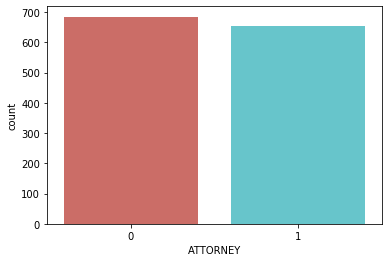

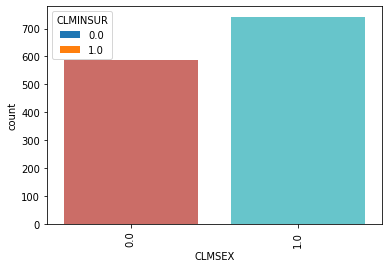

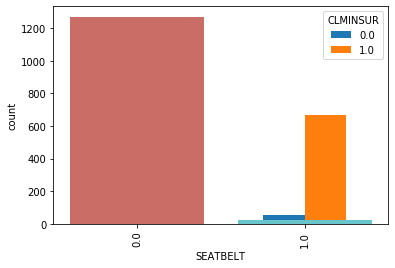

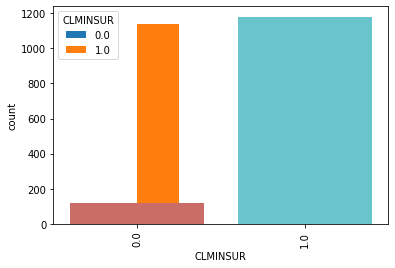

In [4]:
sb.countplot(x='ATTORNEY',data=claimants,palette='hls')

pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

sb.countplot(x='CLMSEX',data=claimants,palette='hls')
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")

sb.countplot(x='SEATBELT',data=claimants,palette='hls')
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind='bar')

sb.countplot(x='CLMINSUR',data=claimants,palette='hls')

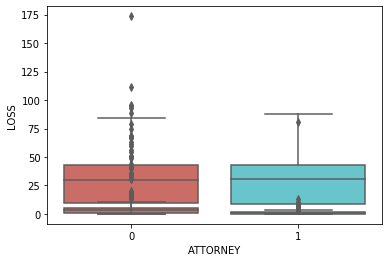

In [5]:
sb.boxplot(x='ATTORNEY',y='CLMAGE',data=claimants,palette='hls')

sb.boxplot(x='ATTORNEY',y='LOSS',data=claimants,palette='hls')

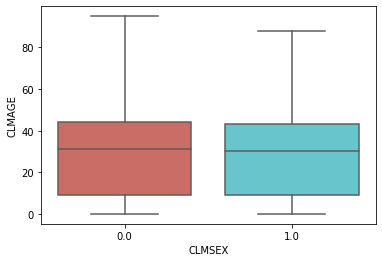

In [6]:
sb.boxplot(x='CLMSEX',y='CLMAGE',data=claimants,palette='hls')

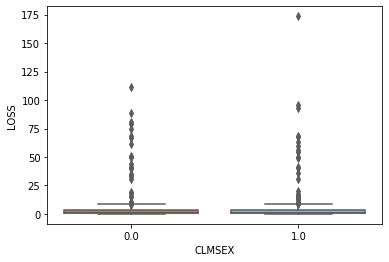

In [7]:
sb.boxplot(x='CLMSEX',y='LOSS',data=claimants,palette='hls')

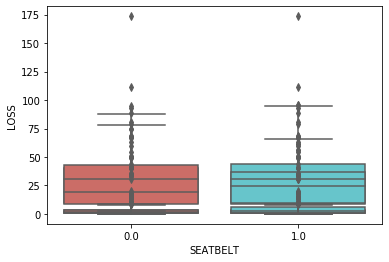

In [8]:
sb.boxplot(x='CLMINSUR',y='CLMAGE',data=claimants,palette='hls')
sb.boxplot(x='CLMINSUR',y='LOSS',data=claimants,palette='hls')
sb.boxplot(x='SEATBELT',y='CLMAGE',data=claimants,palette='hls')
sb.boxplot(x='SEATBELT',y='LOSS',data=claimants,palette='hls')

In [9]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
claimants.shape

(1340, 6)

In [11]:
claimants.dropna().shape

(1096, 6)

##### Now we do imputation based on mode for categorial data and mean for continous data

In [12]:
CLMSEX_Mode = int(claimants.CLMSEX.mode())
CLMSEX_Mode
claimants['CLMSEX'].fillna(CLMSEX_Mode,inplace=True)

In [13]:
CLMINSUR_Mode = int(claimants.CLMINSUR.mode())
CLMINSUR_Mode
claimants['CLMINSUR'].fillna(CLMINSUR_Mode,inplace=True)

In [14]:
SEATBELT_Mode = int(claimants.SEATBELT.mode())
claimants['SEATBELT'].fillna(SEATBELT_Mode,inplace=True)

In [15]:
CLMAGE_Mean = claimants.CLMAGE.mean()
claimants.CLMAGE.fillna(CLMAGE_Mean,inplace=True)

In [16]:
claimants.shape

(1340, 6)

In [17]:
#Model building
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
logistic_model = LogisticRegression()
logistic_model.fit(X,Y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
logistic_model.coef_

array([[ 0.31620084,  0.50087142, -0.52878256,  0.00657581, -0.32259809]])

In [19]:
logistic_model.predict_proba(X)

array([[9.99974219e-01, 2.57808231e-05],
       [4.94202234e-01, 5.05797766e-01],
       [4.24737596e-01, 5.75262404e-01],
       ...,
       [2.85436327e-01, 7.14563673e-01],
       [6.85685541e-01, 3.14314459e-01],
       [3.38841623e-01, 6.61158377e-01]])

In [20]:
y_pred = logistic_model.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [21]:
claimants['y_pred'] = y_pred

In [22]:
y_prob = pd.DataFrame(logistic_model.predict_proba(X.iloc[:,:]))
y_prob
new_df = pd.concat([claimants,y_prob], axis=1)
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.000000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.000000,0.891,1,0.494202,0.505798
2,1,0.0,1.0,0.0,5.000000,0.330,1,0.424738,0.575262
3,0,0.0,1.0,1.0,31.000000,0.037,1,0.489985,0.510015
4,1,0.0,1.0,0.0,30.000000,0.038,1,0.363097,0.636903
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.414422,0.576,1,0.406618,0.593382
1336,0,1.0,1.0,0.0,46.000000,3.705,0,0.549736,0.450264
1337,1,1.0,1.0,0.0,39.000000,0.099,1,0.285436,0.714564
1338,0,1.0,0.0,0.0,8.000000,3.177,0,0.685686,0.314314


In [23]:
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[435, 250],
       [147, 508]], dtype=int64)

In [24]:
type(y_pred)

numpy.ndarray

In [25]:
Accuracy = sum(Y==y_pred)/claimants.shape[0]
Accuracy

0.7037313432835821

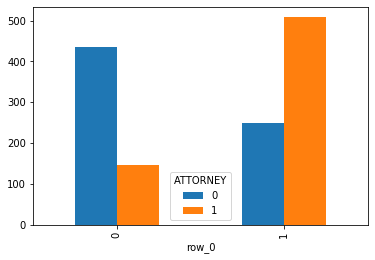

In [26]:
pd.crosstab(y_pred,Y).plot(kind='bar')

### Now trying Logistic regression with new data set 'salary'

In [27]:
sal = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Datasets\Module 9 - Logistic Regression\sal.csv")
sal

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
sal.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [29]:
sal_dummies = pd.get_dummies(sal[['workclass','education','maritalstatus','occupation','relationship','race','sex','native']])
sal_dummies

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
sal.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],inplace=True,axis=1)
sal

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
...,...,...,...,...,...,...
30156,27,12,0,0,38,<=50K
30157,40,9,0,0,40,>50K
30158,58,9,0,0,40,<=50K
30159,22,9,0,0,20,<=50K


In [31]:
salary = pd.concat([sal,sal_dummies],axis=1)
salary

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,>50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
salary['Cat']=0
salary

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Cat
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,>50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30158,58,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
salary.loc[salary.Salary==' >50K','Cat']=1

In [34]:
salary.head(10)

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Cat
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5,0,0,16,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,0,0,45,>50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,31,14,14084,0,50,>50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
9,42,13,5178,0,40,>50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
salary.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [36]:
salary.Cat.value_counts()

0    22653
1     7508
Name: Cat, dtype: int64

In [37]:
salary.drop(['Salary'],inplace=True,axis=1)
salary.head(10)

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Cat
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5,0,0,16,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,0,0,45,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,31,14,14084,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
9,42,13,5178,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


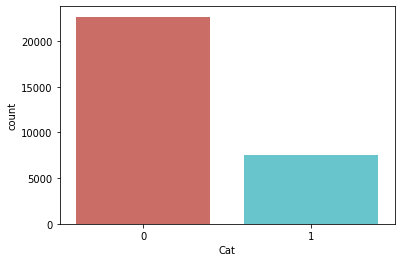

In [38]:
sb.countplot(x='Cat',data=salary,palette='hls')

In [39]:
salary.isnull().sum()

age                        0
educationno                0
capitalgain                0
capitalloss                0
hoursperweek               0
                          ..
native_ Trinadad&Tobago    0
native_ United-States      0
native_ Vietnam            0
native_ Yugoslavia         0
Cat                        0
Length: 103, dtype: int64

In [40]:
x = salary.iloc[:,:103]
y = salary.iloc[:,-1]
salary_logistic = LogisticRegression().fit(x,y)
salary_logistic

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = salary_logistic.predict(x)
y_pred
salary['y_pred']=y_pred
accuracy = sum(y_pred==y)/salary.shape[0]
accuracy

0.9999336892012864

In [46]:
y_prob = pd.DataFrame(salary_logistic.predict_proba(x.iloc[:,:]))
y_prob

,0,1
0,0.994182,0.005818
1,0.957203,0.042797
2,0.996003,0.003997
3,0.986997,0.013003
4,0.958827,0.041173
...,...,...
30156,0.981939,0.018061
30157,0.038534,0.961466
30158,0.997787,0.002213
30159,0.997917,0.002083


In [54]:
salary['0'] = y_prob.iloc[:,0]
salary['1'] = y_prob.iloc[:,1]
salary

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Cat,y_pred,0,1
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.994182,0.005818
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0.957203,0.042797
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.996003,0.003997
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.986997,0.013003
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.958827,0.041173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.981939,0.018061
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0.038534,0.961466
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.997787,0.002213
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.997917,0.002083
